In [1]:
import xarray as xr
import plotnine as pn
import pandas as pd


In [2]:
snakemake_input = dict(
        offshore_deep_awe="build/capacity_factors/capacity_factors_offshore_deep_awe.nc",
        offshore_shallow_awe="build/capacity_factors/capacity_factors_offshore_shallow_awe.nc",
        old_wind_offshore="build/capacity_factors/capacity_factors_old_wind-offshore.nc",
        old_wind_onshore="build/capacity_factors/capacity_factors_old_wind-onshore.nc",
        onshore_awe="build/capacity_factors/capacity_factors_onshore_awe.nc"
)

In [3]:
capacity_factors = {}
for name, path_capacity_factors in snakemake_input.items():
    ds = xr.load_dataset("../"+path_capacity_factors)
    ds = ds.rename({"__xarray_dataarray_variable__": name})
    capacity_factors[name] = ds

In [4]:
ds_cf = pd.concat([i.to_dataframe().groupby("time").agg(lambda x: x.mean(skipna=False)) for key, i in capacity_factors.items()], axis=1)
rename_dict = {"onshore_awe": "AWE onshore", "offshore_shallow_awe": "AWE offshore shallow ", "offshore_deep_awe": "AWE offshore deep ", "old_wind_onshore": "Conventional wind onshore", "old_wind_offshore": "Conventional wind offshore"}
ds_cf = ds_cf.rename(columns=rename_dict)
ds_cf  = ds_cf[rename_dict.values()]
ds_cf

,AWE onshore,AWE offshore shallow,AWE offshore deep,Conventional wind onshore,Conventional wind offshore
time,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,0.378424,0.386146
2010-01-01 01:00:00,NaN,NaN,NaN,0.380985,0.385134
2010-01-01 02:00:00,NaN,NaN,NaN,0.384114,0.384922
2010-01-01 03:00:00,NaN,NaN,NaN,0.387595,0.387168
2010-01-01 04:00:00,NaN,NaN,NaN,0.394606,0.391073
...,...,...,...,...,...
2018-12-31 19:00:00,0.419881,0.554707,0.510512,0.355079,0.392133
2018-12-31 20:00:00,0.427448,0.578082,0.523941,0.363880,0.395812
2018-12-31 21:00:00,0.434406,0.587014,0.524694,0.374888,0.398752


/home/jlauner/.conda/envs/jw4a-d2.1/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 78912 rows containing non-finite values.


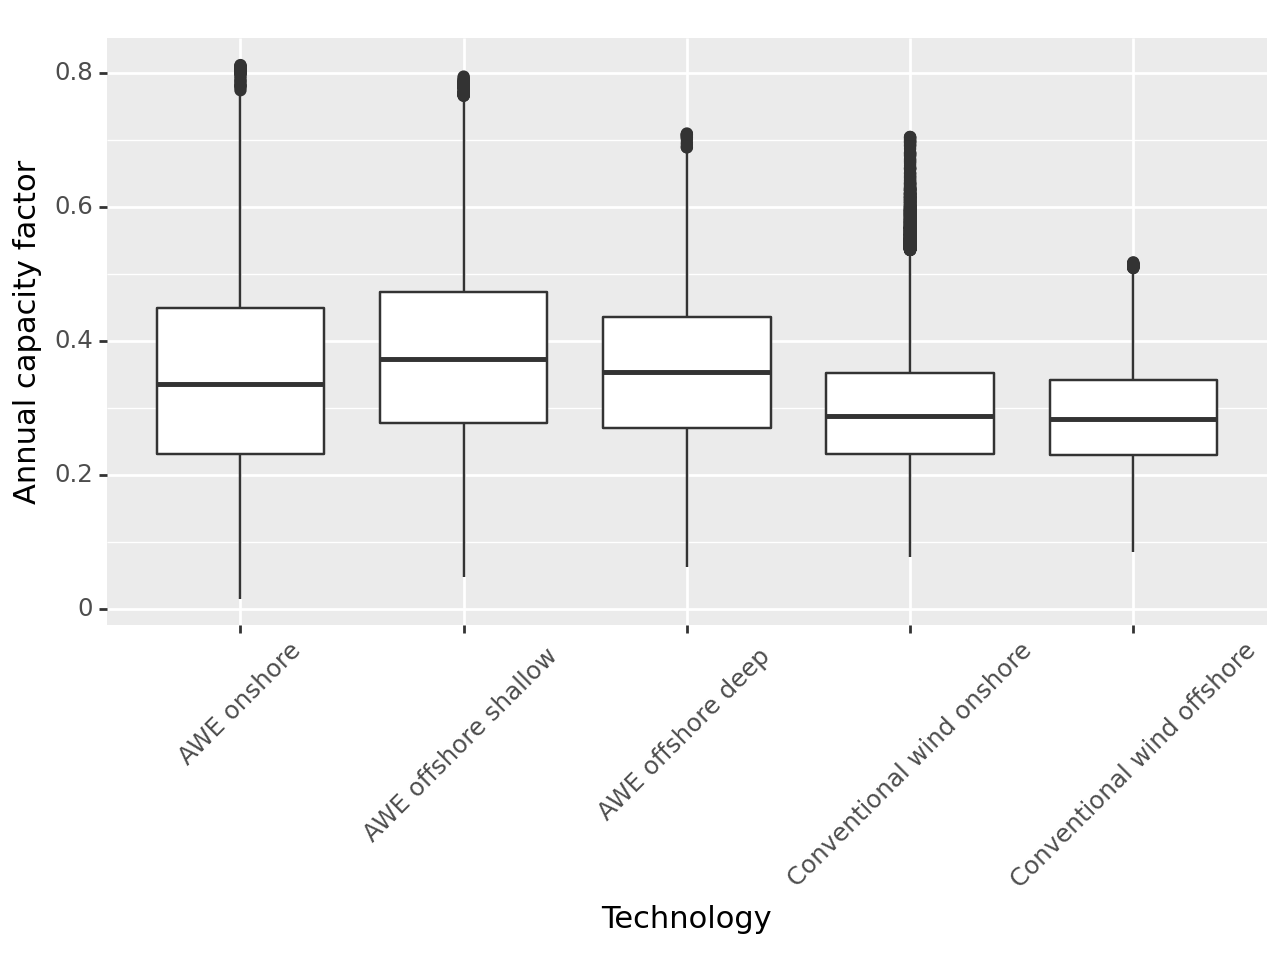

In [29]:
# Step 1: Import modules

import numpy as np
data = ds_cf.melt()
data["variable"] = pd.Categorical(data["variable"], ds_cf.columns)
# Step 3: Create boxplot
boxplot = (
    pn.ggplot(data, aes(x='variable', y='value'))
    + pn.geom_boxplot()
    + pn.labs(x='Technology', y='Annual capacity factor')
    + pn.theme(axis_text_x=pn.element_text(angle=45))
    + pn.stat_summary(
        geom='text', 
        fun_y=np.mean, 
        mapping=pn.aes(label='mean'), 
        va='bottom', 
        size=10
    )
    # + geom_text(aes(label=pn.after_stat('summary')), stat = 'summary')
)
print(boxplot)

   Distribution 1  Distribution 2  Distribution 3  Distribution 4  \
0               1               2               5              10   
1               2               4              10              20   
2               3               6              15              30   
3               4               8              20              40   
4               5              10              25              50   

   Distribution 5  
0               1  
1               3  
2               5  
3               7  
4               9  


/home/jlauner/.conda/envs/jw4a-d2.1/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 22930152 rows containing non-finite values.


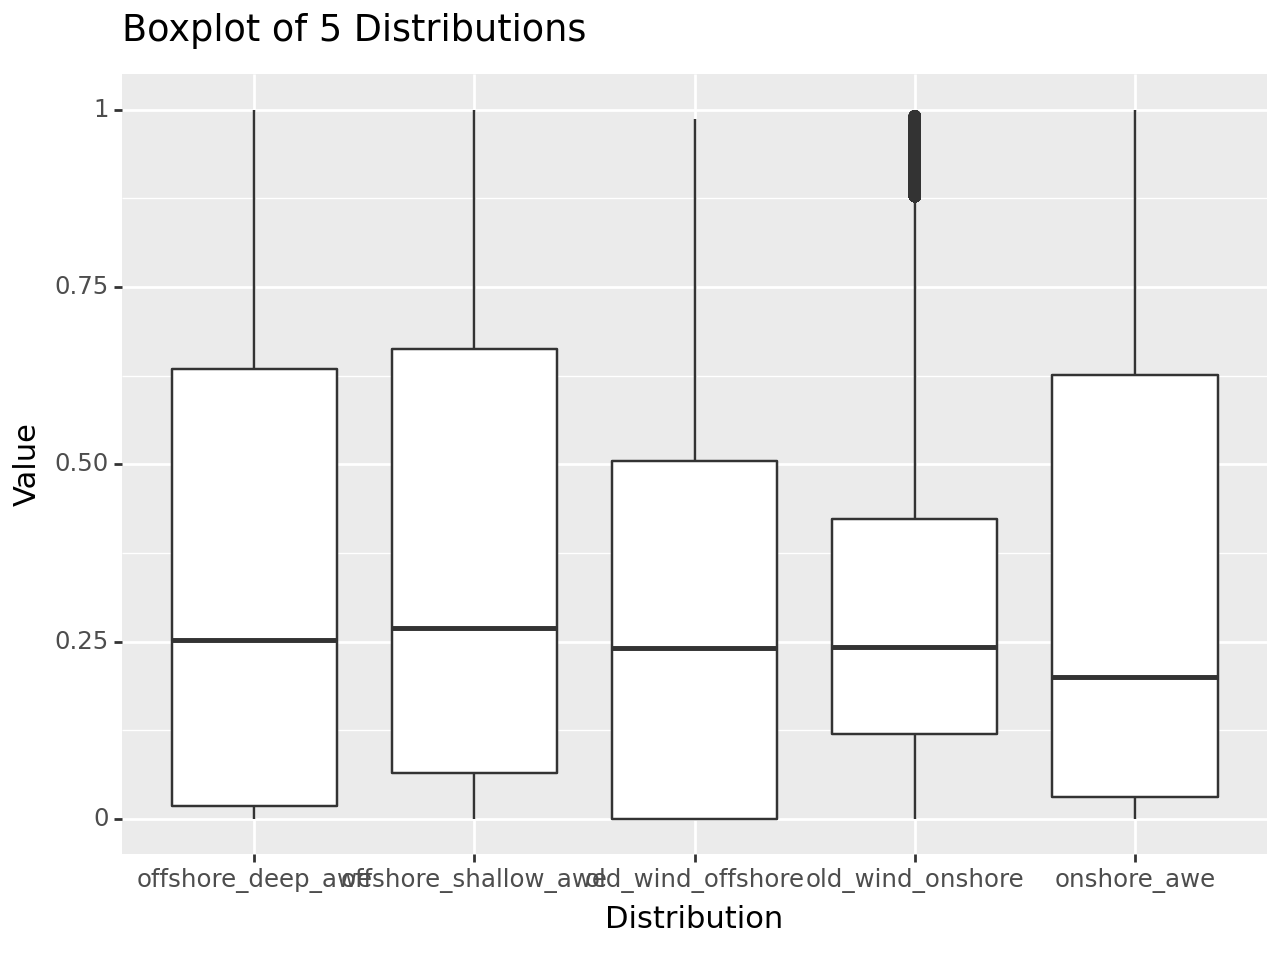

In [39]:
# Step 1: Import modules
from plotnine import *

# Step 3: Create boxplot
boxplot = (
    ggplot(ds_cf.melt(), aes(x='variable', y='value'))
    + geom_boxplot()
    + labs(title='Boxplot of capacity factors', x='Technology', y='Capacity factor')
    + pn.theme(axis_text_x=pn.element_text(angle=45))
)

print(boxplot)

In [ ]:
   Distribution 1  Distribution 2  Distribution 3  Distribution 4  \
0               1               2               5              10   
1               2               4              10              20   
2               3               6              15              30   
3               4               8              20              40   
4               5              10              25              50   

   Distribution 5  
0               1  
1               3  
2               5  
3               7  
4               9  
/home/jlauner/.conda/envs/jw4a-d2.1/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 22930152 rows containing non-finite values.
